# 了解洪水

本文根据[An Overview of the 2013 Colorado Floods](https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/colorado-floods-2013/)的内容，简单记录下洪水基本概念，以及如何使用数据来帮助我们了解洪水。这个教程是以2013 年科罗拉多洪水为例介绍的。

## The 2013 Colorado Flood

2013年9月上旬，缓慢移动的冷锋穿过科罗拉多州，并与暖锋相交，导致大雨，造成科罗拉多州前沿山脉的毁灭性洪水泛滥。科罗拉多州的博尔德县（Boulder County）位于落基山脉与高原之间的交汇处，受到了这次洪水事件的影响。

什么是洪水呢？

洪水是指水淹没了平常的土地。科学家（生态学家）通常将洪水称为**扰动事件（disturbance events）**。扰动事件是环境条件的临时变化（temporary change），会导致生态系统发生较大变化。火灾，地震，海啸，空气污染和人类发展都是扰动事件的例子。尽管洪水等扰动事件可能只发生在几分钟或几天内，但其生态**影响却可能持续数十年甚至更长**。有些科学家会将洪水列作 极端事件extreme events 乃至灾害 hazards。

科罗拉多历史上就有不少洪灾，博尔德县和科罗拉多州总体上都容易遭受山洪和河流洪水的影响。像2013年科罗拉多州洪水一样，山洪暴发是水流突然急剧增加，通常是由于极端天气造成的。河流洪水发生的速度较慢，而且更容易预测。2013年的洪灾被归类为“百年一遇”洪灾（“100 year flood”），这意味着每年发生此类洪水的可能性为1％。据报道，博尔德发生的第一场大洪水发生在1894年，也是“百年一遇”洪水。博尔德的第一个非本地定居者于1858年到来，因此在那之前应有许多未报告的洪水发生。

根据：[Why A Hundred Year Flood Can Occur Every Year](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/floods-return-period-and-probability/)，简单补充下百年一遇的示例代码。

In [2]:
# Import packages
import os
import urllib
import requests
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
import hydrofunctions as hf

# Date time conversion registration
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Get the data & set working director
data = et.data.get_data('colorado-flood')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")
# Create map of stations
hf.draw_map()
# Request data for all stations in Colorado
PR = hf.NWIS(stateCd='CO').get_data()

# List the names for the first 5 sites in Colorado, USA
PR.siteName[0:5]

Extracted output to /home/owen/earth-analytics/data/colorado-flood/.


['COLORADO CREEK NEAR SPICER, CO.',
 'GRIZZLY CREEK NEAR SPICER, CO.',
 'BUFFALO CREEK NEAR HEBRON, CO.',
 'GRIZZLY CREEK NEAR HEBRON, CO.',
 'GRIZZLY CREEK NEAR WALDEN, CO']

In [3]:
# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)
# Request data for the site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

# Get metadata about the data
hf.get_nwis(site, 'dv').json()

{'name': 'ns1:timeSeriesResponseType',
 'declaredType': 'org.cuahsi.waterml.TimeSeriesResponseType',
 'scope': 'javax.xml.bind.JAXBElement$GlobalScope',
 'value': {'queryInfo': {'queryURL': 'http://waterservices.usgs.gov/nwis/dv/format=json%2C1.1&sites=06730500&parameterCd=00060',
   'criteria': {'locationParam': '[ALL:06730500]',
    'variableParam': '[00060]',
    'parameter': []},
   'note': [{'value': '[ALL:06730500]', 'title': 'filter:sites'},
    {'value': '[mode=LATEST, modifiedSince=null]',
     'title': 'filter:timeRange'},
    {'value': 'methodIds=[ALL]', 'title': 'filter:methodId'},
    {'value': '2020-04-11T15:15:43.091Z', 'title': 'requestDT'},
    {'value': '4fa2b520-7c07-11ea-a47a-6cae8b6642ea', 'title': 'requestId'},
    {'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.gov/nwis/help/?provisional for more information.',
     'title': 'disclaimer'},
    {'value': 'sdas01', 'title': 'server'}]},
  'timeSeries': [{'sourceInfo': {'siteName': '

In [4]:
# Get the data in a pandas dataframe format
longmont_discharge = hf.extract_nwis_df(longmont_resp)
longmont_discharge.head()

,USGS:06730500:00060:00003,USGS:06730500:00060:00003_qualifiers
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


In [5]:
# Rename columns
longmont_discharge.columns = ["discharge", "flag"]

# View first 5 rows
longmont_discharge.head()

,discharge,flag
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


[Text(0, 0.5, 'Discharge Value (CFS)'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Stream Discharge - Station 06730500 \n 1946-05-10 to 2018-08-29')]

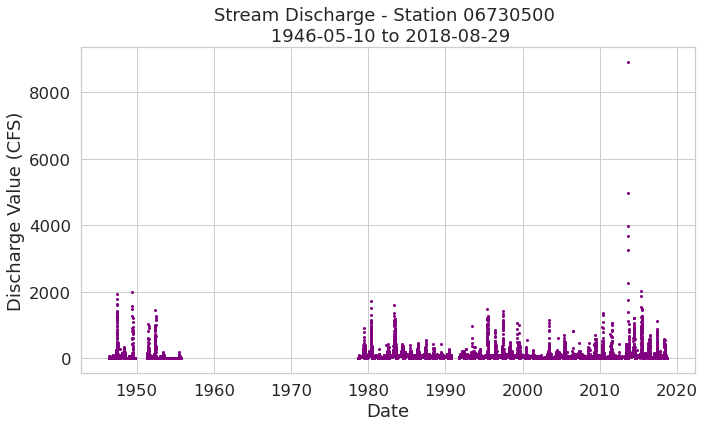

In [6]:
# Plot using matplotlib
%matplotlib inline
fig, ax = plt.subplots(figsize=(11, 6))

ax.scatter(x=longmont_discharge.index,
           y=longmont_discharge["discharge"],
           marker="o",
           s=4,
           color="purple")

ax.set(xlabel="Date", ylabel="Discharge Value (CFS)",
       title="Stream Discharge - Station {} \n {} to {}".format(site, start, end))

In [7]:
# add a year column to your longmont discharge data
longmont_discharge["year"] = longmont_discharge.index.year

# Calculate annual max by resampling
longmont_discharge_annual_max = longmont_discharge.resample('AS').max()
longmont_discharge_annual_max.head()

,discharge,flag,year
datetime,,,
1946-01-01,99.0,A,1946.0
1947-01-01,1930.0,A,1947.0
1948-01-01,339.0,A,1948.0
1949-01-01,2010.0,A,1949.0
1950-01-01,NaN,NaN,NaN


In [8]:
# Download usgs annual max data from figshare
url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"

download_path = os.path.join("data", "colorado-flood", 
                             "downloads", "annual-peak-flow.txt")

urllib.request.urlretrieve(url, download_path)

# A function that counts the number of lines with a comment 
def count_the(file_url):
    r = requests.get(file_url, stream=True)
    file = r.text
    count = 0
    for line in file:
        if line.startswith('#'):
            count += 1
    return count

# Lines to skip
line_to_skip = count_the(url)+1

# Open the data using pandas
usgs_annual_max = pd.read_csv(download_path,
                              skiprows=[line_to_skip],
                              comment="#",
                              sep='\t',
                              usecols=["peak_dt","peak_va"],
                              parse_dates=["peak_dt"],
                              index_col="peak_dt")

usgs_annual_max.head()

,peak_va
peak_dt,
1927-07-29,407.0
1928-06-04,694.0
1929-07-23,530.0
1930-08-18,353.0
1931-05-29,369.0


In [9]:
# Add a year column to the data for easier plotting
usgs_annual_max["year"] = usgs_annual_max.index.year

# Are there any years that have two entries?
usgs_annual_max[usgs_annual_max.duplicated(subset="year") == True]

,peak_va,year
peak_dt,,
1947-10-15,721.0,1947
1993-10-18,497.0,1993


In [10]:
# Remove duplicate years - keep the max discharge value
usgs_annual_max = usgs_annual_max.sort_values(
    'peak_va', ascending=False).drop_duplicates('year').sort_index()

# If this returns no results you have successfully removed duplicates!
usgs_annual_max[usgs_annual_max.duplicated(subset="year") == True]

,peak_va,year
peak_dt,,


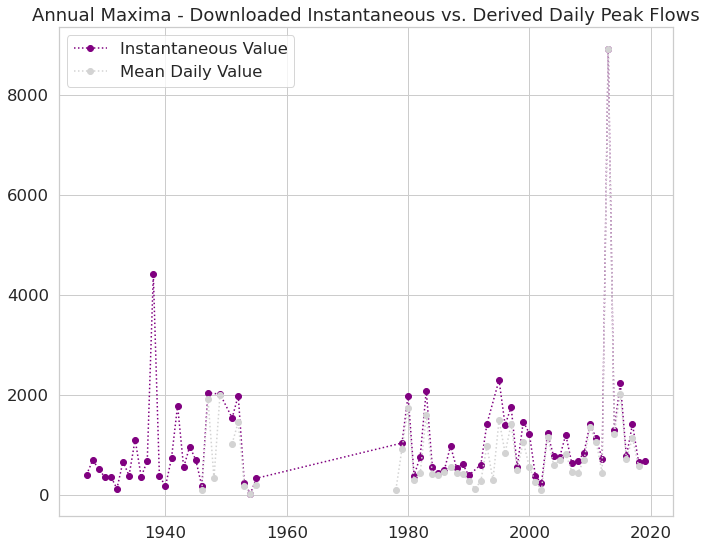

In [11]:
# Plot calculated vs USGS annual max flow values
fig, ax = plt.subplots(figsize=(11, 9))

ax.plot(usgs_annual_max["year"],
        usgs_annual_max["peak_va"],
        color="purple",
        linestyle=':',
        marker='o',
        label="Instantaneous Value")

ax.plot(longmont_discharge_annual_max["year"],
        longmont_discharge_annual_max["discharge"],
        color="lightgrey",
        linestyle=':',
        marker='o', label="Mean Daily Value")

ax.legend()

ax.set_title(
    "Annual Maxima - Downloaded Instantaneous vs. Derived Daily Peak Flows")

plt.show()

In [12]:
# Sort data smallest to largest
longmont_discharge_sorted = longmont_discharge.sort_values(by="discharge")

# Count total obervations
n = longmont_discharge_sorted.shape[0]

# Add a numbered column 1 -> n to use in return calculation for rank
longmont_discharge_sorted.insert(0, 'rank', range(1, 1 + n))

# Calculate probability - note you may need to adjust this value based upon the time period of your data
longmont_discharge_sorted["probability"] = (
    (n - longmont_discharge_sorted["rank"] + 1) / (n + 1))
longmont_discharge_sorted["return-years"] = (
    1 / longmont_discharge_sorted["probability"])

In [13]:
# Create a function from the workflow below

# Add an argument for annual vs daily...


def calculate_return(df, colname):
    '''
    Add Documentation Here


    '''
    # Sort data smallest to largest
    sorted_data = df.sort_values(by=colname)
    
    # Count total obervations
    n = sorted_data.shape[0]
    
    # Add a numbered column 1 -> n to use in return calculation for rank
    sorted_data.insert(0, 'rank', range(1, 1 + n))
    
    # Calculate probability
    sorted_data["probability"] = (n - sorted_data["rank"] + 1) / (n + 1)
    
    # Calculate return - data are daily to then divide by 365?
    sorted_data["return-years"] = (1 / sorted_data["probability"])

    return(sorted_data)

longmont_prob = calculate_return(longmont_discharge, "discharge")

# Because these data are daily, divide return period in days by 365 to get a return period in years
longmont_prob["return-years"] = longmont_prob["return-years"] / 365
longmont_prob["probability"] = longmont_prob["probability"] * 365
longmont_prob.tail()

,rank,discharge,flag,year,probability,return-years
datetime,,,,,,
2013-09-16,17078,3270.0,A e,2013,0.106831,9.360548
2013-09-12,17079,3680.0,A,2013,0.085465,11.700685
2013-09-15,17080,3970.0,A e,2013,0.064099,15.600913
2013-09-14,17081,4970.0,A e,2013,0.042733,23.401370
2013-09-13,17082,8910.0,A e,2013,0.021366,46.802740


In [14]:
# Calculate the same thing using the USGS annual max data
usgs_annual_prob = calculate_return(usgs_annual_max, "peak_va")
usgs_annual_prob.head()

,rank,peak_va,year,probability,return-years
peak_dt,,,,,
1954-01-14,1,26.0,1954,0.985075,1.015152
1932-07-13,2,128.0,1932,0.970149,1.030769
1940-07-03,3,174.0,1940,0.955224,1.046875
1946-07-19,4,178.0,1946,0.940299,1.063492
2002-05-24,5,238.0,2002,0.925373,1.080645


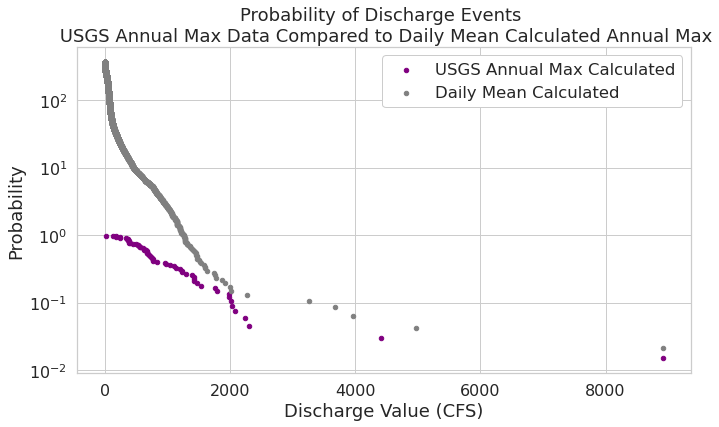

In [15]:
# Compare both datasets
fig, ax = plt.subplots(figsize=(11, 6))

usgs_annual_prob.plot.scatter(x="peak_va",
                              y="probability",
                              title="Probability ",
                              ax=ax,
                              color='purple',
                              fontsize=16,
                              logy=True,
                              label="USGS Annual Max Calculated")

longmont_prob.plot.scatter(y="probability",
                           x="discharge",
                           title="Probability ",
                           ax=ax,
                           color='grey',
                           fontsize=16,
                           logy=True,
                           label="Daily Mean Calculated")

ax.legend(frameon=True,
          framealpha=1)

ax.set_ylabel("Probability")
ax.set_xlabel("Discharge Value (CFS)")

ax.set_title(
    "Probability of Discharge Events \n USGS Annual Max Data Compared to Daily Mean Calculated Annual Max")

plt.show()

Text(0, 0.5, 'Discharge Value (CFS)')

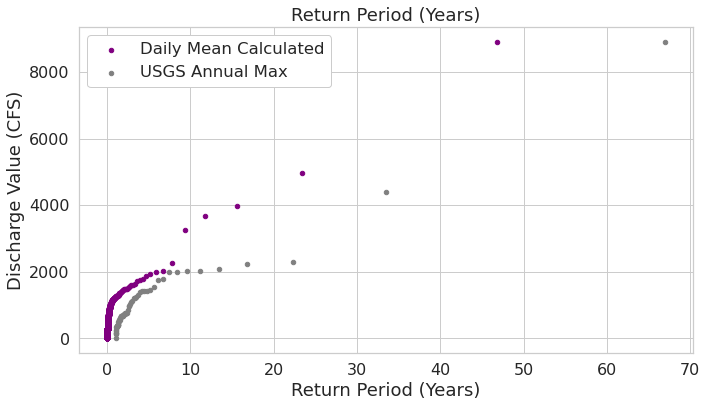

In [16]:
fig, ax = plt.subplots(figsize=(11, 6))

longmont_prob.plot.scatter(y="discharge",
                           x="return-years",
                           title="Return Period (Years)",
                           ax=ax,
                           color='purple',
                           fontsize=16,
                           label="Daily Mean Calculated")

usgs_annual_prob.plot.scatter(y="peak_va",
                              x="return-years",
                              title="Return Period (Years)",
                              ax=ax,
                              color='grey',
                              fontsize=16,
                              label="USGS Annual Max")
ax.legend(frameon=True,
          framealpha=1)

ax.set_xlabel("Return Period (Years)")
ax.set_ylabel("Discharge Value (CFS)")

博尔德县的**地貌**使其容易遭受洪水。附近的山脉形成陡峭的斜坡和峡谷，就像斜溜槽一样，将水泄入下游平原。这些山脉还创造了导致频繁的局地暴雨 isolated storms 的**大气条件**。此外，科罗拉多州的前沿山脉容易遭受野火和干旱的影响。这些**扰动事件使土壤吸收水分的能力降低**，这既增加了洪水泛滥的可能性，又加剧了洪水泛滥的可能性。

那么我们如何衡量洪水的成因和影响？

可以利用多种数据来衡量洪水的成因和影响，包括**降水量数据 precipitation data，干旱指数 drought indices，河流流量数据 stream discharge data，激光雷达地形数据 lidar terrain data 和其他遥感图像 remotely sensed imagery**，遥感图像可以直观地显示由于侵蚀，泥石流和其他影响而发生了变化的区域。

|Data Type|Potential Data Source|
|-|-|
|Atmospheric Conditions|National Oceanic and Atmospheric Association (NOAA) GOES Satellite Data|
|Drought|National Drought Mitigation Center Drought Monitor|
|Precipitation|National Weather Service COOP data|
|Stream Discharge|United States Geological Survey (USGS) Surface Water Data|
|Lidar Terrain Data|USGS Lidar Data|
|Other remotely sensed imagery|USGS Landsat Data, European Space Agency Sentinel-2 Data, United States Department of Agriculture (USDA) NAIP Data|

接下来更详细地了解洪水的驱动因素和影响以及用于量化这些驱动因素和影响的数据。然后，了解如何在Python中处理不同类型的数据，以更好地理解洪水事件，包括：

- Stream discharge data
- Precipitation data
- Lidar data

## How the Atmosphere Drives Floods

先来看看洪水的主要驱动因素：大气条件 Atmospheric Conditions-洪水影响的驱动因素。

什么是大气条件？

大气条件是产生天气weather的原因。该术语是指地球大气中的物理条件，包括温度，风，云和降水。

如何测量大气条件？

大气条件可以通过地面观测ground-based或卫星观测satellite observations来测量。地面测量可以包括空气温度air temperature和热指数heat indices，大气压力barometric pressure，湿度humidity，降水precipitation，风速和风向 wind speed and direction，以及太阳辐射solar radiation。

有一些跟踪大气条件的卫星，其中最常见的是由NOAA运行的对地静止运行环境卫星系统 Geostationary Operational Environmental Satellite System （GOES）。

GOES系统由空间和地面工具组成，这些工具共同协作以支持天气预报，极端风暴追踪和气象学研究。GOES卫星是“对地静止的”同步卫星，这意味着它们始终停留在地球表面的一个特定点上面，从而使它们能够提供有关该位置天气状况的可靠信息。

那在哪里可以获取大气数据？

大气数据的来源之一是NOAA对地静止卫星服务器NOAA Geostationary Satellite Server上的GOES卫星数据。

接下来看看科罗拉多州洪水的大气条件。导致2013年Boulder洪水的风暴始于缓慢移动的冷锋与温暖潮湿的暖锋相交导致的大雨。暴风雨通过水蒸气系统保持在科罗拉多洛矶山脉东部山脉的限制区域confined area。这种限制导致大量降雨在短时间内倾泻到该地区。在短短五天的时间里，博尔德县的降雨量比一个典型年还多。

现在来导入一组降雨数据看看。

In [17]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
print(et.io.HOME)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
# Download csv of temp (F) and precip (inches) in July 2018 for Boulder, CO
file_url = "https://ndownloader.figshare.com/files/12948515"
et.data.get_data(url=file_url)

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file
file_path = os.path.join("data", "earthpy-downloads",
                         "july-2018-temperature-precip.csv")

# Import file into pandas dataframe
boulder_july_2018 = pd.read_csv(file_path)
boulder_july_2018.head()

/home/owen


,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


In [18]:
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   max_temp  31 non-null     int64  
 2   precip    31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


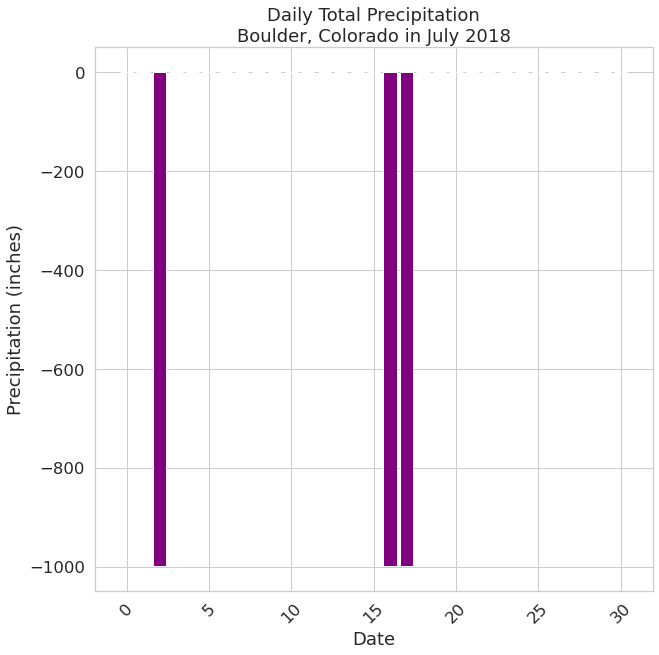

In [19]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

接下来看看干旱数据。

可以在美国国家干旱缓解中心网站（the National Drought Mitigation Center website）上获取有关干旱的数据，并了解有关测量干旱的更多方法。

现在看看干旱与科罗拉多洪水间的关系。2013年的洪水恰好发生在科罗拉多州的严重干旱结束之时。在干旱时期，表层土壤和其中的吸收水分的有机物质 moisture-absorbing organic matter（通常是处于分解的各个阶段的动植物残留物）变干。土壤分层示意图：

![](soil-layers-colorado-floods.jpg)

In this diagram of soils layers you can see the the organic and top soil layers that are often dried out during drought periods. Source:Wikipedia.

**干燥的有机物吸收水分的能力较弱，也会很容易地被风吹走，只在其下面留下渗透性更差的硬土**。某些类型的土壤（如粘土）可能会变干，以至于它们几乎像人行道路一样不透水，无法吸收水分。

所有这些都导致水流过土壤，而不被吸收到土壤中。流过土壤陆地的水称为地表径流overland flow。通常，对某个地区产生重大影响的洪水都会有大量的地表径流。

## 径流数据

什么是Stream Discharge？Stream Discharge或flow是指在固定时间内流经指定点的水量。测量河流的流量可以帮助科学家了解流经某个区域的水的数量和速度，这在洪水期间尤为重要。

在哪里可以找到径流数据？

USGS是最常见的径流数据源之一，它在全国的河流和小溪中维护着传感器网络。除了径流之外，这些传感器还监视其他对溪流形态和健康状况很重要的变量，例如水位，流速和流动方向。

USGS具有分布在全美河流中的水中传感器分布式网络。该网络检测一系列变量，这些变量对了解河流形态和健康状况很重要。该传感器网络监视的度量指标之一就是“Stream Discharge”，该指标量化了向下游流动的水量。流量是量化水流的理想指标，流量在洪水期间会显着增加。

根据USGS的定义：Discharge 是指单位时间内沿河或溪向下流动的水量，通常以每秒立方英尺或每天加仑表示。通常，河道流量是通过将河道横截面中水的面积乘以该横截面中水的平均速度来计算的如下图所示

![](measure-stream-discharge-colorado-floods.png)

有关USGS收集的径流数据的更多信息可以参考：[How Streamflow is Measured](https://www.usgs.gov/special-topic/water-science-school/science/how-streamflow-measured?qt-science_center_objects=0#qt-science_center_objects)。

前面径流数据的读取已经展示过了，这里不再赘述，USGS径流数据可以在[USGS Water Data for the Nation](https://waterdata.usgs.gov/nwis)查看

在博尔德洪水期间，大气条件，降水和干旱共同导致河流流量迅速增加。2013年洪水期间，博尔德溪的溪流流量是平均流量的100倍，这使得小河溢出了河岸。溪流中水的速度使其能够吸收并移动大量碎屑.

## 降水数据

降水是指大气中的水蒸气凝结而掉落到地面的水分。术语降水可以指雨，雪甚至冰雹。尽管降水是洪水事件的最常见驱动因素，但冰雪融化也会导致或加剧洪水。

降水被报告为每个时间段内给定区域内的降水总量（毫米，厘米或英寸）。各种类型的量规可用于测量降水。它们通常很简单，就像一个带有垂直刻度的小塑料圆筒，用于收集水。这些降水量计可以手动检查。在某些情况下，有自动系统可以记录一段时间内的降水量。

在哪里可以找到降水数据？

一些美国政府组织收集了降水数据。比如[国家气象局（NWS）合作观察者平台（COOP）](https://www.weather.gov/coop/)的数据。

该平台由数千名自愿气象观测员操作，包括11,000多个站点，其中约5,000个用于测量气候。这些气候站报告24小时的最低和最高温度 24 hour minimum and maximum temperature，等效液体降水 liquid equivalent precipitation ，降雪 snowfall，降雪深度 snow depth 和其他天气指标。

降水数据的另一个 ‘citizen science’ 来源是 [CoCoRaHS](https://www.cocorahs.org/) 。与COOP相比，该志愿者网络仅测量降水。

接下来看看科罗拉多洪水的降水。科罗拉多州博尔德的年平均降水量（包括雨雪）为20英寸。降雨来自冬季降雪，夏季强烈雷暴和全年间断性暴风雨。

导致2013年洪水的降雨是夏末风暴。由于大气条件，暴风雨在短时间内产生了大量降水。

那洪水期间博尔德得了多少雨？下图显示了位于科罗拉多州博尔德的国家气象局COOP站点从1948年到2013年每个月的总降水量。在这65年的数据中，您可以看到2013年9月的降水量出现了跳跃。

![](2018-02-05-coflood-04-flood-drivers-precipitation_3_0.png)

## Measure Changes in the Terrain Caused by a Flood Using Lidar Data

科罗拉多州的洪水对环境，社会和经济产生了重大影响。对洪水的驱动因素以及如何进行测量（包括大气和干旱以及降水和溪流排放）了解后，看看如何使用遥感测量洪水事件对landscape的影响。

使用lidar数据可以了解洪水期间地形的变化。LiDAR数据可用于测量海拔随时间的变化。那么什么是激光雷达数据？LIDAR 全称 Light Detection and Ranging，是一种主动遥感系统，可用于测量较广区域的植物高度。

因为没有资源来一棵棵树测量，科学家经常需要表征大区域的植被。科学家通常使用远程方法工具估计大范围的关键特征。遥感意味着科学家实际上并没有实际用双手进行物理测量，而是使用传感器来捕获有关 landscape 的信息并记录可用于估计条件和特征的事物。

那如何使用激光雷达测量洪水对 landscape 的影响？沉积和侵蚀是洪水造成的常见landscape影响。这些过程发生在大雨导致水流激增时，水流产生的能量将沉积物从一个地方侵蚀并将其转移到另一个地方。卫星和飞机上的激光雷达传感器扫描地形并创建地球表面高程的模型。

洪水事件之前和之后收集的激光雷达数据可用于量化洪水造成的沉积和侵蚀。激光雷达还可用于量化树木，建筑物和地球表面其他物体的损失或移动。

激光雷达数据通常会转换为栅格格式，因为它更易于使用。数字高程模型（DEM）是激光雷达衍生的常见栅格产品。DEM可以是仅测量地面标高（地形）的数字地形模型（DTM），也可以是测量地球表面上所有物体（包括树木，建筑物或其他结构）的标高的数字表面模型（DSM） 。

使用激光雷达数据创建DEM，以分析由于科罗拉多州洪水造成的 landscape 变化。

在哪里可以找到激光雷达数据？一些公共组织提供免费的激光雷达数据，包括：

- [USGS Earth Explorer](https://earthexplorer.usgs.gov/)
- [OpenTopography](http://www.opentopography.org/)
- [The National Map](https://www.usgs.gov/core-science-systems/ngp/tnm-delivery/)
- [National Ecological Observatory Network (NEON)](http://www.neonscience.org/)

接下来使用的数据由NEON收集。使用高程模型跟踪洪水影响，使用数字地形模型跟踪地形变化，使用2013年洪水前后收集的数据为科罗拉多州博尔德市较低的四英里峡谷溪地区创建的数字地形模型（DTM）。这些地图显示了高程的细微差异，尤其是沿河床。但是，用肉眼真正比较这些地图是一项挑战。

尽管以上DEM在外观上几乎相同，但它们可用于创建另一个模型，该模型对于研究洪水影响更为有用，即数字高程差模型（DoD）。通过从另一个DTM中减去一个DTM来创建DoD，并显示在特定时间段内给定位置发生的更改。

下面是使用四英里峡谷溪DTM创建的DoD。洪水过后，紫色区域的海拔较低；换句话说，他们经历了侵蚀；绿色区域的海拔更高，并且经历了沉积。

DoD表示的数据的横截面。橙色区域是地球表面比以前低的地方，而蓝绿色区域是地球表面比以前高的地方。